<Figure size 1296x864 with 0 Axes>

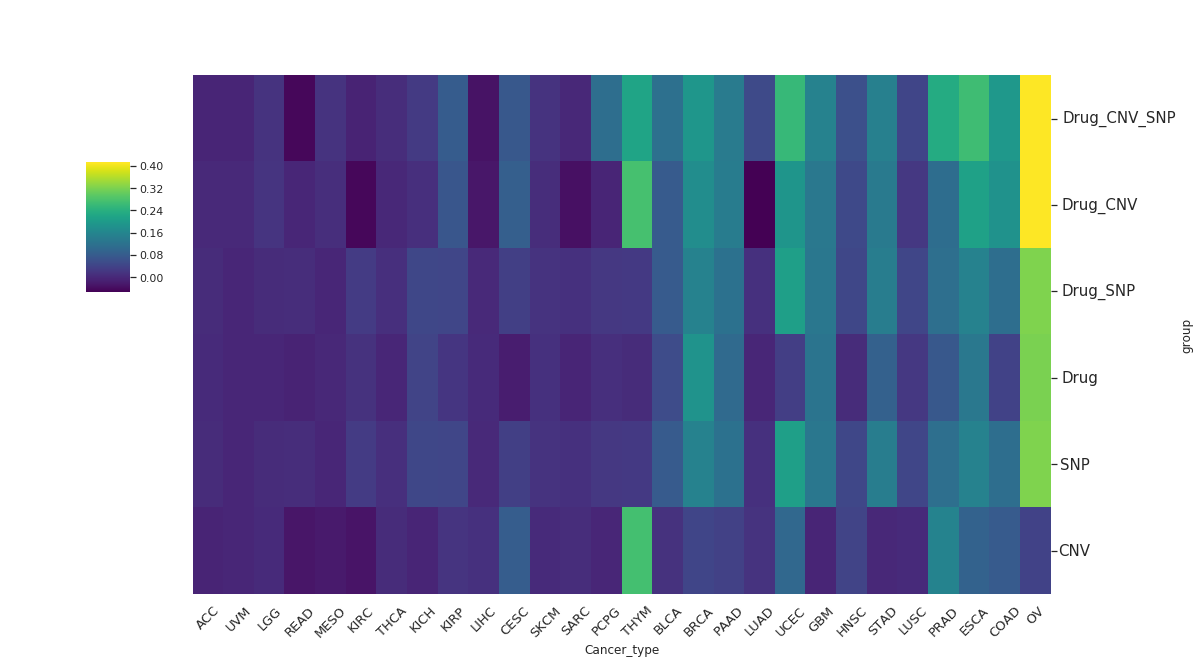

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load input data and calculate mean c_index
data_path = "../result/C_index_result.csv"
data = pd.read_csv(data_path)
df_mean = data.groupby(["Cancer_type", "group"])["c_index"].mean().unstack()

# Sort by baseline and calculate relative delta
df_mean_sorted = df_mean.sort_values(by='baseline', ascending=False)
df_delta_rel = df_mean_sorted.subtract(df_mean_sorted['baseline'], axis=0)
df_delta_rel = df_delta_rel.divide(df_mean_sorted['baseline'], axis=0).drop(columns=['baseline'])

# Reorder columns and transpose for plotting
reordered_columns = ['drug_cnv_snp', 'drug_cnv', 'drug_snp', 'drug', 'snp', 'cnv']
df_delta_rel = df_delta_rel[reordered_columns]
df_delta_rel_transposed = df_delta_rel.T
custom_xlabels = df_mean_sorted.index

# Create clustered heatmap
plt.figure(figsize=(18, 12))
clustered_heatmap_rel = sns.clustermap(df_delta_rel_transposed, 
                                        cmap='viridis', 
                                        cbar_kws={'shrink': 0.7}, 
                                        xticklabels=custom_xlabels,
                                        yticklabels=['Drug_CNV_SNP', 'Drug_CNV', 'Drug_SNP', 'Drug', 'SNP', 'CNV'],
                                        col_cluster=False, 
                                        row_cluster=False,
                                        figsize=(20, 12))

# Adjust subplot, labels, and colorbar position
clustered_heatmap_rel.fig.subplots_adjust(right=0.85, bottom=0.2)
plt.setp(clustered_heatmap_rel.ax_heatmap.get_xticklabels(), rotation=45, ha='center', fontsize=13)
plt.setp(clustered_heatmap_rel.ax_heatmap.get_yticklabels(), rotation=0, va='center', ha='right', fontsize=15)

y_labels = clustered_heatmap_rel.ax_heatmap.get_yticklabels()
manual_adjustments = {3: (0.01, 0), 2: (0.0528, 0), 1: (0.0552, 0), 0: (0.1, 0)}
for i, label in enumerate(y_labels):
    if i in manual_adjustments:
        x_offset, y_offset = manual_adjustments[i]
        current_pos = label.get_position()
        label.set_position((current_pos[0] + x_offset, current_pos[1] + y_offset))

clustered_heatmap_rel.cax.set_position([0.18, 0.55, 0.03, 0.15])
clustered_heatmap_rel.ax_heatmap.yaxis.set_tick_params(pad=33)

plt.savefig("Fig_2C.png", dpi=300)
plt.show()